In [96]:
import strava

import requests

import matplotlib.pyplot as plt
plt.style.use('seaborn')

C:\Users\voyno\AppData\Local\Temp\ipykernel_22476\526681769.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [40]:
resp = strava.auth().json()
athlete_id = resp['athlete']['id']
access_token = resp['access_token']

In [75]:
activities = strava.get_activities(access_token)
activity_id = activities[0]['id']
activity_id

8239649371

In [29]:
activities_url = {
    'url': 'https://www.strava.com/api/v3/',
    'params': {'header': {'Authorization': f'Bearer {access_token}'},
    'param': {'per_page': 200, 'page': 1}}
}

In [42]:
resp = requests.get(
    activities_url['url'] + f'activities/{activity_id}/zones', 
    headers=activities_url['params']['header'], 
    params=activities_url['params']['param']
)
resp.json()

[{'score': 82.0,
  'distribution_buckets': [{'min': 0, 'max': 123, 'time': 175},
   {'min': 123, 'max': 153, 'time': 3075},
   {'min': 153, 'max': 169, 'time': 639},
   {'min': 169, 'max': 184, 'time': 324},
   {'min': 184, 'max': -1, 'time': 0}],
  'type': 'heartrate',
  'resource_state': 3,
  'sensor_based': True,
  'points': 6,
  'custom_zones': False}]

In [43]:
resp = requests.get(
    activities_url['url'] + f'activities/{activity_id}/laps', 
    headers=activities_url['params']['header'], 
    params=activities_url['params']['param']
)
resp.json()[0]

{'id': 27639821606,
 'resource_state': 2,
 'name': 'Lap 1',
 'activity': {'id': 8239649371, 'resource_state': 1},
 'athlete': {'id': 98390356, 'resource_state': 1},
 'elapsed_time': 612,
 'moving_time': 612,
 'start_date': '2022-12-12T12:27:43Z',
 'start_date_local': '2022-12-12T06:27:43Z',
 'distance': 1609.34,
 'start_index': 0,
 'end_index': 174,
 'total_elevation_gain': 7.4,
 'average_speed': 2.63,
 'max_speed': 4.595,
 'average_cadence': 87.0,
 'device_watts': False,
 'average_heartrate': 132.8,
 'max_heartrate': 148.0,
 'lap_index': 1,
 'split': 1,
 'pace_zone': 0}

In [76]:
resp = requests.get(
    activities_url['url'] + f'activities/{activity_id}/streams?keys=latlng&key_by_type=true', 
    headers=activities_url['params']['header'], 
    params=activities_url['params']['param']
)
stream = resp.json()

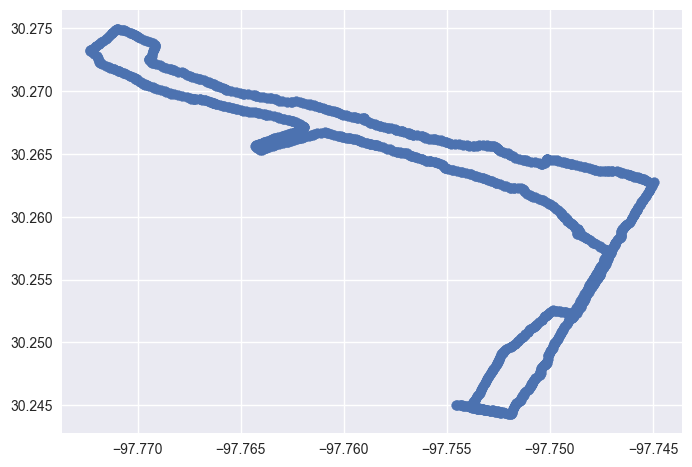

In [98]:
data = {
    "lat": [],
    "lng": [],
}
for lat, lng in stream['latlng']['data']:
    data['lat'].append(lat)
    data['lng'].append(lng)

plt.scatter(data['lng'], data['lat'])
plt.show()